# Part I - Prosper loan data Investigation
## By Babawale kehinde


## Investigation Overview

The data to be investigataed is sourced from proper loan data hosted on udacity workspace, Prosper is a peer-to-peer marketplace of lending platform in US. About 0.9 million people have gotten loan from it and the loan amount has been $14 billion. It matches investors and borrower. This Investigation is to explore the distrbution of major Features and identify trend in based on the loan term





## Dataset Overview

The dataset can be found in the  udacity repository on Amazon library [here]( https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv),
with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).
The data consist of 81 columns(attributes) and 113937 rows (obersavtions). In this reserach i will be exploring mainly the relationship of the borrower's income Range, loan status, employment status, states e.t.c..


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# using pickle to import data frame
df = pd.read_pickle("Loan Viz file.pkl")
df.head()

#replacing "Full-time", "Self-employed", 'Part-time' with "Employed".

df = df.replace(to_replace=["Full-time", "Self-employed", 'Part-time'],
           value="Employed")
df['EmploymentStatus'].value_counts()

Employed         100899
Not available      5347
Other              3806
Not employed        835
Retired             795
Name: EmploymentStatus, dtype: int64

In [3]:
df.loan_status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: loan_status, dtype: int64

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Income Range and Loan Status

> The below Graph shows the log scale distribution of Borrower's Imcome Range and Loan status.

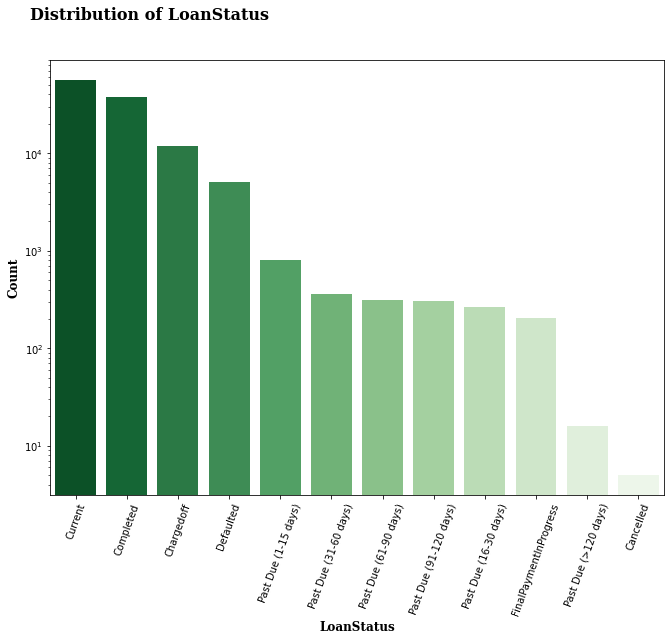

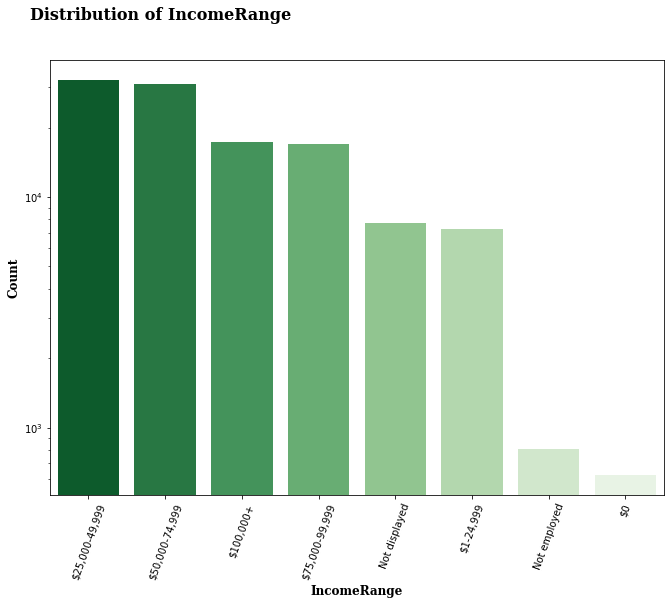

In [4]:
  cols = ['LoanStatus','IncomeRange']
for i in cols:
    #fig, ax = plt.subplots(2,2)
    fig, ax = plt.subplots(1,1, figsize=(11, 8))
    sb.countplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Greens_r')
    fig.text(0.1, 0.95, f'Distribution of {i}', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xticks(rotation=70)
    plt.xlabel(f'{i}', fontsize=12, fontweight='bold', fontfamily='serif')
    plt.ylabel('Count', fontsize=12, fontweight='bold', fontfamily='serif')
    #log scaling
    plt.yscale('log')
plt.show()

## Loan Amount by Employment Status and Loan Term

> We can see that most of loan are issued for 36 months Term and there is increase trend in loan amount issued to the employed, not employed and others as the loan term increase for 12 mmonths to 60 month with exception in not-applicable category, i suspect they are inputed based on asumption to be 36 month as they are not avialiabe.

 

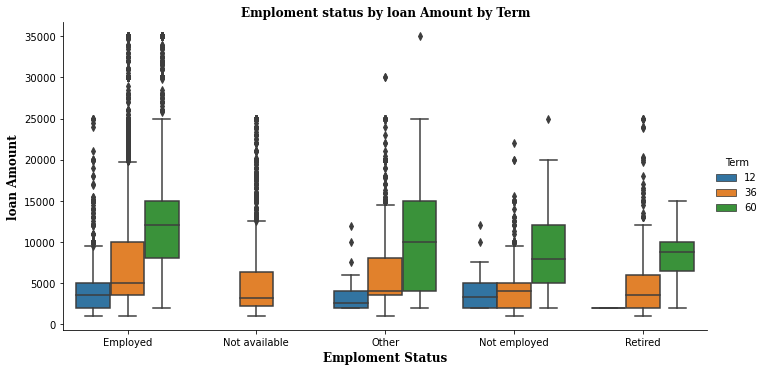

<Figure size 792x576 with 0 Axes>

In [5]:
sb.catplot(data=df, x='EmploymentStatus', y="LoanOriginalAmount", hue="Term", kind="box",height=5, aspect=2, palette=None)
plt.xlabel(f'Emploment Status', fontsize=12, fontweight='bold', fontfamily='serif')
plt.ylabel('loan Amount', fontsize=12, fontweight='bold', fontfamily='serif')
plt.title('Emploment status by loan Amount by Term', fontsize=12, fontweight='bold', fontfamily='serif')
plt.figure(figsize=[ 11,8]);

## Loan Amount by Income Range and Loan Term

> we observe that for 60 months Term loans, amount of loan disbursed  decrease as income range decrease from 100,000 to 1. for 36 month term loan bororwer with the income range of 50,000 and 74,000 has the highest loan amount. for 12 month term loans, borrower with the range of 75,000 - 99,999 has the highe loan amount.




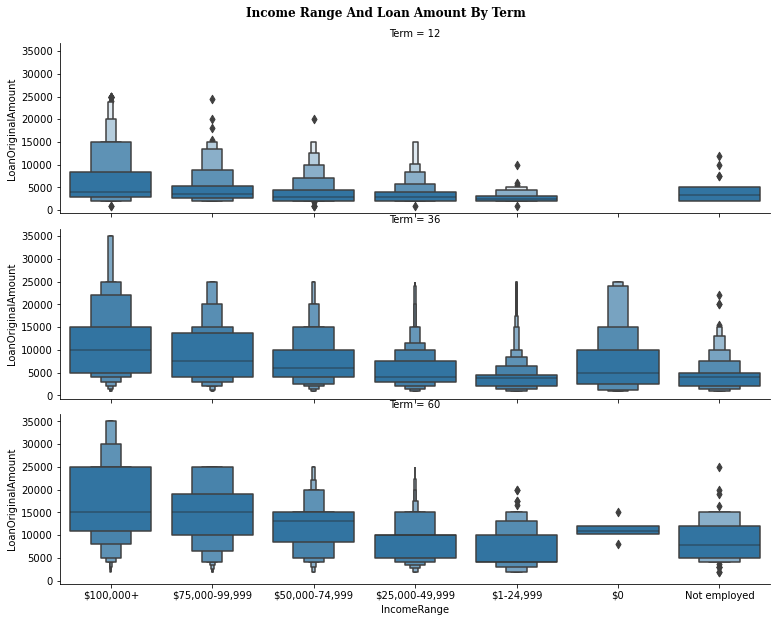

In [7]:
# faceting loan amout with employment status using Term
order = ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed']
f = sb.FacetGrid(data = df,col = 'Term', col_wrap = 1,  height=5, aspect=2, palette=None)
f.map(sb.boxenplot,"IncomeRange",'LoanOriginalAmount', order = order)
##labelling axis and titile
plt.suptitle('Income range and loan Amount by Term'.title(), y=1.04,fontsize=12, fontweight='bold', fontfamily='serif')
f.fig.set_size_inches(11,8);


# Thank you.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_visualization_loanprosper.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_visualization_loanprosper.ipynb to slides
[NbConvertApp] Writing 727001 bytes to Part_II_slide_visualization_loanprosper.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\k2k\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\k2k\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\k2k\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\k2k\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\k2k\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_note

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
